# Math 352 Assignment 3
### Kaetlyn Gibson
### Math 352

## Problem 1
 Consider the following ordered list of points p1, . . . , p8:
 
\begin{align} 
(1, 0),(3, 3),(0, 1),(−3, 3),(−1, 0),(−3, −3),(0, −1),(3, −3) \\
\end{align}

Connect these points with a smooth curve f(t) = (x(t), y(t)), where x and
y are natural cubic splines with knots t<sub>i</sub> = i (0 ≤ i ≤ 8). In Jupyter, draw
this curve, as well as the graphs of its derivatives f'(t), f''(t). In all three
graphs, label the points. Then interpret these graphs - just from looking
at the graphs, how can I deduce that the curve they depict is made from
splines?


https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.special import comb # n choose k
import matplotlib.pyplot as plt


In [2]:
# get our x and y values from points p1,...,p8
points = {'p1':(1, 0),
          'p2':(3,3),
          'p3':(0,1),
          'p4':(-3, 3),
          'p5':(-1, 0),
          'p6':(-3, -3),
          'p7':(0, -1),
          'p8':(3, -3)
         }
t_val = [t for t in range(8)]
x_val = [points[pt][0] for pt in points]
y_val = [points[pt][1] for pt in points]

# check values
print(t_val)
print(x_val)
print(y_val)

[0, 1, 2, 3, 4, 5, 6, 7]
[1, 3, 0, -3, -1, -3, 0, 3]
[0, 3, 1, 3, 0, -3, -1, -3]


In [3]:
spline_x = CubicSpline(t_val, x_val, bc_type = "natural")
spline_y = CubicSpline(t_val, y_val, bc_type = "natural")

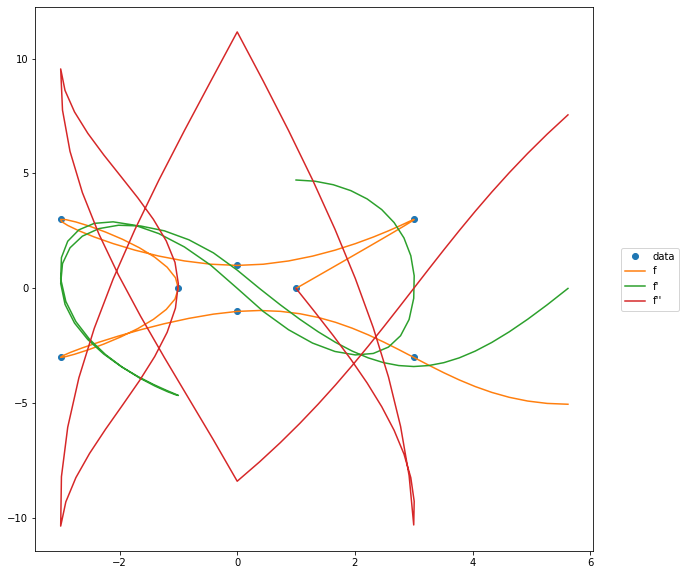

In [4]:
# plot
ts = np.arange(0, 8, 0.1) # start, stop, step
plt.figure(figsize=(10,10))
plt.plot(x_val, y_val, 'o', label='data')
plt.plot(spline_x(ts), spline_y(ts), label="f") # orange line
plt.plot(spline_x(ts), spline_y(ts, 1), label="f'") # green line
plt.plot(spline_x(ts), spline_y(ts, 2), label="f''") # red line
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

I think I did this right... Specifically looking at f (orange line), the curves follow the lines quite closely.

## Problem 2
Construct a parametric Bezier curve g(x, t) = (u(t), v(t)), where u(t) and
v(t) are Bezier curves (see sec. 9.3), using the same points in problem 1,
and produce the same plots. Again, interpret the plots - what can you
deduce about the smoothness of the Bezier curve? Then, change the point
(-1,0) to (0,0). What happens to the spline and the bezier?

Curve fitting code from here, but I changed the bernstein polynomial to that of the one in the text book : https://stackoverflow.com/questions/12643079/b%c3%a9zier-curve-fitting-with-scipy#12644499

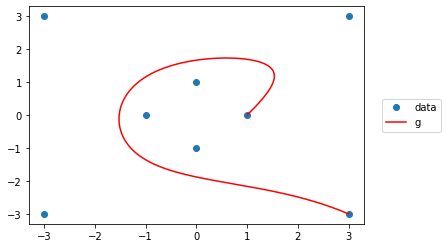

In [5]:
# for bezier, before changing the point
points = {'p1':(1, 0),
          'p2':(3,3),
          'p3':(0,1),
          'p4':(-3, 3),
          'p5':(-1, 0), 
          'p6':(-3, -3),
          'p7':(0, -1),
          'p8':(3, -3)
         }
t_pts = [t for t in range(8)]
u_pts = [points[pt][0] for pt in points]
v_pts = [points[pt][1] for pt in points]

# bezier
def bernstein_poly(i, n, t):
    return comb(n, i) * (t**(i)) * (1 - t)**(n-i)

def b_curve(x_pts, y_pts, n):
    t = np.linspace(0, 1, 1000)
    p_array = np.array([bernstein_poly(i, n-1, t) for i in range(n)])
    x_vals = np.dot(x_pts, p_array)
    y_vals = np.dot(y_pts, p_array)
    return x_vals, y_vals

# plot
curveU = b_curve(t_pts, u_pts, 8)
curveV = b_curve(t_pts, v_pts, 8)
plt.plot(u_pts, v_pts, 'o', label='data')
plt.plot(curveU[1],curveV[1], color='red', label="g")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

# the curve seems to avoid all points except for some chosen endpoints. Very curvy.

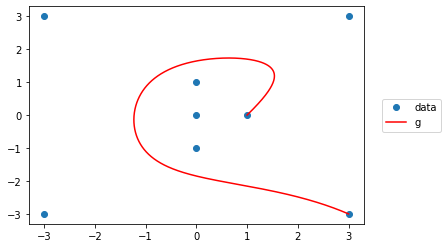

In [6]:
# for bezier, after changing the point
points1 = {'p1':(1, 0),
          'p2':(3,3),
          'p3':(0,1),
          'p4':(-3, 3),
          'p5':(0, 0), #changed
          'p6':(-3, -3),
          'p7':(0, -1),
          'p8':(3, -3)
         }
t_pts = [t for t in range(8)]
u_pts1 = [points1[pt][0] for pt in points1]
v_pts1 = [points1[pt][1] for pt in points1]

# bezier
def bernstein_poly(i, n, t):
    return comb(n, i) * (t**(i)) * (1 - t)**(n-i)

def b_curve(x_pts, y_pts, n):
    t = np.linspace(0, 1, 1000)
    p_array = np.array([bernstein_poly(i, n-1, t) for i in range(n)])
    x_vals = np.dot(x_pts, p_array)
    y_vals = np.dot(y_pts, p_array)
    return x_vals, y_vals

# plot
curveU1 = b_curve(t_pts, u_pts1, 8)
curveV1 = b_curve(t_pts, v_pts1, 8)
plt.plot(u_pts1, v_pts1, 'o', label='data')
plt.plot(curveU1[1],curveV1[1], color='red', label="g")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

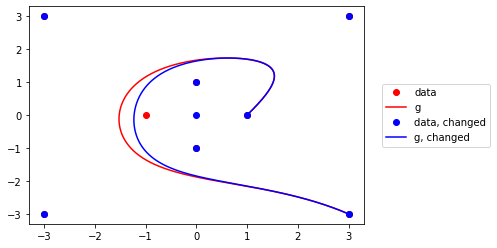

In [7]:
# combined graphs
curveU = b_curve(t_pts, u_pts, 8)
curveV = b_curve(t_pts, v_pts, 8)
curveU1 = b_curve(t_pts, u_pts1, 8)
curveV1 = b_curve(t_pts, v_pts1, 8)

plt.plot(u_pts, v_pts, 'o', color='red', label='data')
plt.plot(curveU[1],curveV[1], color='red', label="g")

plt.plot(u_pts1, v_pts1, 'o', color='blue', label='data, changed')
plt.plot(curveU1[1],curveV1[1], color='blue', label="g, changed")

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

# There isn't much difference in the bezier curves, but clearly the left side of the graph shrinks
# into the right as the changed point moves right

  ---

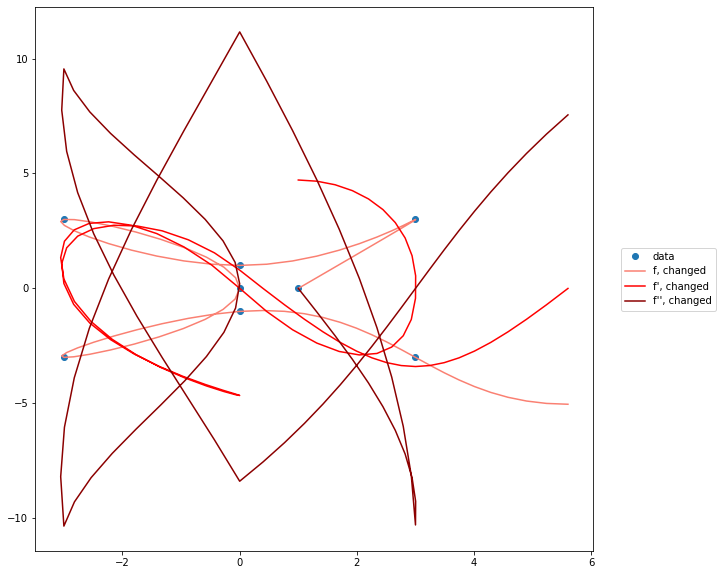

In [8]:
# for spline, after changing the point
points = {'p1':(1, 0),
          'p2':(3,3),
          'p3':(0,1),
          'p4':(-3, 3),
          'p5':(0, 0), #changed
          'p6':(-3, -3),
          'p7':(0, -1),
          'p8':(3, -3)
         }
t_val = [t for t in range(8)]
x_val = [points[pt][0] for pt in points]
y_val = [points[pt][1] for pt in points]

spline1_x = CubicSpline(t_val, x_val, bc_type = "natural")
spline1_y = CubicSpline(t_val, y_val, bc_type = "natural")

# plot
ts = np.arange(0, 8, 0.1) # start, stop, step
plt.figure(figsize=(10,10))
plt.plot(x_val, y_val, 'o', label='data')
plt.plot(spline1_x(ts), spline1_y(ts), color = "salmon", label="f, changed") 
plt.plot(spline1_x(ts), spline1_y(ts, 1), color = "red", label="f', changed")
plt.plot(spline1_x(ts), spline1_y(ts, 2), color = "darkred", label="f'', changed")

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

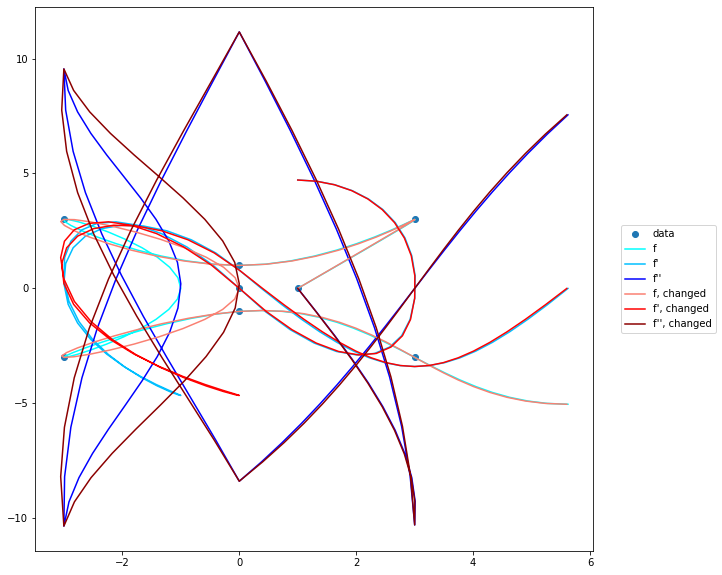

In [9]:
# for spline, after changing the point (combined changed point and original graphs)
points = {'p1':(1, 0),
          'p2':(3,3),
          'p3':(0,1),
          'p4':(-3, 3),
          'p5':(0, 0), #changed
          'p6':(-3, -3),
          'p7':(0, -1),
          'p8':(3, -3)
         }
t_val = [t for t in range(8)]
x_val = [points[pt][0] for pt in points]
y_val = [points[pt][1] for pt in points]

spline1_x = CubicSpline(t_val, x_val, bc_type = "natural")
spline1_y = CubicSpline(t_val, y_val, bc_type = "natural")

# plot
ts = np.arange(0, 8, 0.1) # start, stop, step
plt.figure(figsize=(10,10))
plt.plot(x_val, y_val, 'o', label='data')
plt.plot(spline_x(ts), spline_y(ts), color = "cyan", label="f") 
plt.plot(spline_x(ts), spline_y(ts, 1),color = "deepskyblue", label="f'")
plt.plot(spline_x(ts), spline_y(ts, 2),color = "blue", label="f''")

plt.plot(spline1_x(ts), spline1_y(ts), color = "salmon", label="f, changed") 
plt.plot(spline1_x(ts), spline1_y(ts, 1), color = "red", label="f', changed")
plt.plot(spline1_x(ts), spline1_y(ts, 2), color = "darkred", label="f'', changed")

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

# the left side of the graph changes significantly, with the little loops in f being larger than before
# to me, the change is most obvious in f''

# can comment out the certain plots to visualize better

## Problem 3
Solve the initial value problem
\begin{align}
x'(t) = \frac{1}{2}tx^2 − x \\
x(0) = 1 \\
\end{align}

over the range [0, 1] using Euler’s method. Then solve the same equation
with the order-2 and order-4 Runge-Kutta methods; if possible, choose
a value of h which lets you see that the methods are producing slightly
different, but realistic, solutions. Plot all 3 curves on the same axes, and
overlay a graph of the slope field (i.e. make a plot like figure 10.1 or 10.2
in the text).


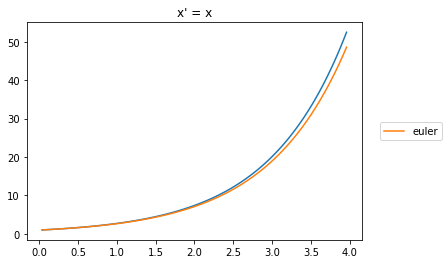

In [10]:
#text example from text
def f(t, x):
    return x

def euler(f, x, n):
    x_vals=[]
    t_vals=[]
    
    a = 0;
    b = 4;
    t = a
    h = (b-a)/n
    for k in range(1, n):
        x += h*f(t, x)
        t += h
        x_vals.append(x)
        t_vals.append(t)
    return t_vals, x_vals

result = euler(f, 1, 100)
t_vals = result[0]
x_vals = result[1]

# plot
plt.plot(t_vals, np.exp(t_vals))
plt.plot(t_vals, x_vals, label="euler") # orange line
plt.title("x' = x")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

In [11]:
# euler's method
def euler(f, n):
    x_vals=[]
    t_vals=[]
    
    a = 0; b = 1; x = 1
    t = a
    h = (b-a)/n
    for k in range(1, n):
        x += h*f(t, x)
        t += h
        x_vals.append(x)
        t_vals.append(t)
    return t_vals, x_vals

In [12]:
# runge-kutta order 2 (adapted from rk4)
def rk2(f, n):
    x_vals=[]
    t_vals=[]
    a = 0; b = 1; x = 1
    h = (b-a)/n
    t = a
    ta = t
    for j in range(1, n):
        k1 = h*f(t,x) 
        k2 = h*f(t+h,x+k1)
        x += (1/2)*(k1+k2)
        t = ta + j*h
        x_vals.append(x)
        t_vals.append(t)
    return t_vals, x_vals

In [13]:
# runge-kutta order 4 from text, was tested with their example
def rk4(f, n):
    x_vals=[]
    t_vals=[]
    a = 0; b = 1; x = 1
    h = (b-a)/n
    t = a
    ta = t
    for j in range(1, n):
        k1 = h*f(t,x) 
        k2 = h*f(t+0.5*h,x+0.5*k1)
        k3 = h*f(t+0.5*h,x+0.5*k2)
        k4 = h*f(t+h,x+k3)
        x += (1/6)*(k1+2*k2+2*k3+k4)
        t = ta + j*h
        x_vals.append(x)
        t_vals.append(t)
    return t_vals, x_vals

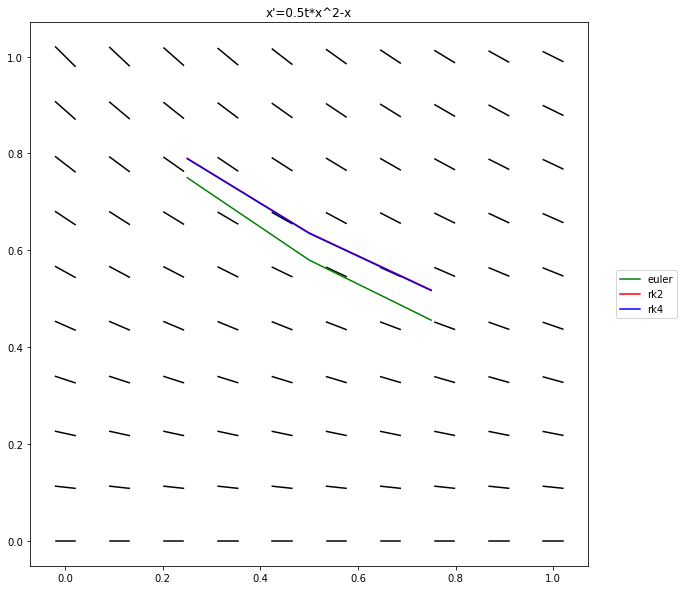

In [14]:
def f(t, x):
    return (0.5*t)*(x**2)-x

n = 4

e = euler(f, n)
r2 = rk2(f, n)
r4 = rk4(f, n)

t = np.linspace(0,1,10)
x = np.linspace(0,1,10)

plt.figure(figsize=(10,10))
for i in t:
    for j in x:
        slope = f(i,j)
        domain = np.linspace(i-0.02,i+0.02,2) # line length
        def fun(t1,x1):
            z = slope*(domain-t1)+x1
            return z  
        plt.plot(domain,fun(i,j),color='black',solid_capstyle='projecting',solid_joinstyle='bevel')

plt.plot(e[0], e[1], color='green', label="euler")
plt.plot(r2[0], r2[1], color='red', label="rk2")
plt.plot(r4[0], r4[1], color='blue', label="rk4")
plt.title("x'=0.5t*x^2-x")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

# can barely see difference between r2 and r4, which is why n is so small. 
# Increasing n makes the curves smoother, but also makes rk2 disappear into rk4

Slope field code from: https://www.r-bloggers.com/2014/09/generate-slope-fields-in-r-and-python/

## Problem 4
Verify that the Order-4 Runge-Kutta method “works” – i.e. produces the true solution plus a O(h<sup>5</sup>) error term - when f(t, x) is the exponential growth equation f(t, x) = x.

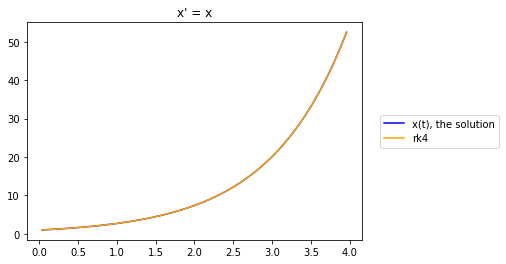

In [15]:
# runge-kutta order 4
def rk4(f, n):
    x_vals=[]
    t_vals=[]
    a = 0; b = 4; x = 1
    h = (b-a)/n
    t = a
    ta = t
    for j in range(1, n):
        k1 = h*f(t,x) 
        k2 = h*f(t+0.5*h,x+0.5*k1)
        k3 = h*f(t+0.5*h,x+0.5*k2)
        k4 = h*f(t+h,x+k3)
        x += (1/6)*(k1+2*k2+2*k3+k4)
        t = ta + j*h
        x_vals.append(x)
        t_vals.append(t)
    return t_vals, x_vals

def f(t, x):
    return x

result = rk4(f, 100)
t_vals = result[0]
x_vals = result[1]

# plot
plt.plot(t_vals, np.exp(t_vals), color = "blue", label="x(t), the solution")# x(t) = e^t
plt.plot(t_vals, x_vals,color = "orange", label="rk4")
plt.title("x' = x")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

#I don't think this is exactly what you were looking for, 
# but it looked very similar to the textbook example used for Euler's method 
# (aka The Taylor series method of order 1), where the solution is x(t)=e^t.
# The rk4 method is much closer to the solution line.